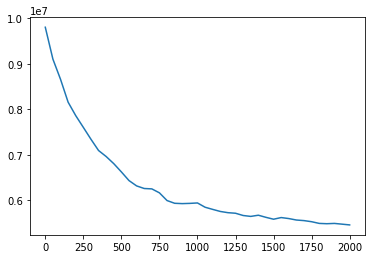

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy import linalg

def read_all_Data():
    train = open('./dataset/u1.base')
#   读取训练集
    content = train.readline()
    trainset = []
    while(content):
        record = content.split()
        temp = []
        for item in record:
            temp.append(int(item))
        trainset.append(temp)
        content = train.readline()
    test = open('./dataset/u1.test')
#     读取测试集
    content = test.readline()
    testset = []
    while (content):
        record = content.split()
        temp = []
        for item in record:
            temp.append(int(item))
        testset.append(temp)
        content = test.readline()
    return trainset,testset
# 转换为矩阵
def toMatrix(set):
    matrixSet = np.array(set)
    x = np.max(matrixSet.T[0])
    y = np.max(matrixSet.T[1])
    R = np.zeros([x,y],int)
    for item in set:
        R[item[0]-1][item[1]-1] = item[2]
    return R,x,y
def toMatrix1(set,x,y):
    matrixSet = np.array(set)
    R = np.zeros([x,y],int)
    for item in set:
        R[item[0]-1][item[1]-1] = item[2]
    return R
def initPQ(n_train,n_test,k):
    p = np.random.random(size = (n_train,k))
    p = p / np.max(p)
    q = np.random.random(size = (n_test,k))
    q = q / np.max(q)
    return p,q
# 计算Loss
def loss(P,Q,R,lamP,lamQ,testset):
    ans = 0.0
    length = len(testset)
    R_temp = np.array(np.mat(P) * np.mat(Q.T))
    for i in range(len(R)):
        for j in range(len(R[0])):
            if R[i][j] != 0:
                ans += (R_temp[i][j] - R[i][j]) * (R_temp[i][j] - R[i][j])+lamP*linalg.norm(P[i])*linalg.norm(P[i])+lamQ * linalg.norm(Q[j])*linalg.norm(Q[j])
    return ans
# 得到梯度
def getGraident(P,Q,R,lamp,lamq,set):
    E = R[set[0]-1][set[1]-1] - (P[set[0]-1] * Q[set[1]-1]).sum()
    pGrad = E * -Q[set[1]-1] + lamp * P[set[0]-1]
    qGrad = E * -P[set[0]-1] + lamq * Q[set[1]-1]
    return pGrad,qGrad
# 梯度下降
def GradientDescent(P,Q,R,lamp,lamq,set,learningRate,iteration):
    P_Group = [P]
    Q_Group = [Q]
    for i in range(iteration):
        index = int(random.random() * len(set))
        pGrad,qGrad = getGraident(P_Group[-1],Q_Group[-1],R,lamp,lamq,set[index])
        temp_P = np.copy(P_Group[-1])
        temp_Q = np.copy(Q_Group[-1])
        temp_P[set[index][0]-1] = P[set[index][0]-1] - pGrad*learningRate
        temp_Q[set[index][1]-1] = Q[set[index][1]-1] - qGrad*learningRate
        P_Group.append(temp_P)
        Q_Group.append(temp_Q)
    return P_Group,Q_Group
def main(lamp,lamq,learningRate,iteration,k):
    train,test = read_all_Data()
    train_R,x,y = toMatrix(train)
    test_R = toMatrix1(test,x,y)
    P,Q = initPQ(len(train_R),len(train_R[0]),k)
    P_Group,Q_Group = GradientDescent(P,Q,train_R,lamp,lamq,train,learningRate,iteration)
    train_dif_Group = []
    test_dif_Group = []
    length = len(test)
    for i in range(len(P_Group)):
        if i % 50 != 0:
            continue
        test_dif_Group.append(loss(P_Group[i],Q_Group[i],test_R,lamp,lamq,test))
    plt.plot([i*50 for i in range(len(test_dif_Group))], test_dif_Group, label='test_loss')
    plt.show()
main(0.3,0.3,0.01,2000,100)